# Resume Screening
The task of selecting the best talent among many others is known as Resume Screening. Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

[Source link](https://thecleverprogrammer.com/2020/12/06/resume-screening-with-python/)

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
resume_dataset = pd.read_csv("data/UpdatedResumeDataSet.csv")
resume_dataset.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Categories of resumes present in the dataset

In [3]:
print("Displaying the distinct categories of resume and the number of records belonging to each category:")
print(resume_dataset["Category"].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


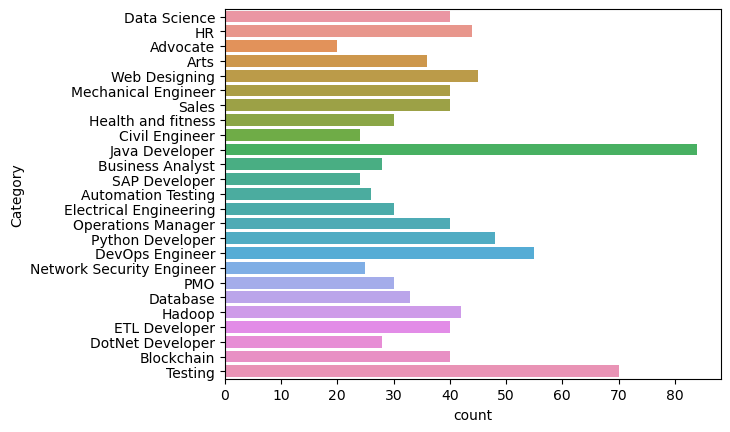

In [4]:
sns.countplot(resume_dataset, y="Category");

### Visualize the distribution of categories

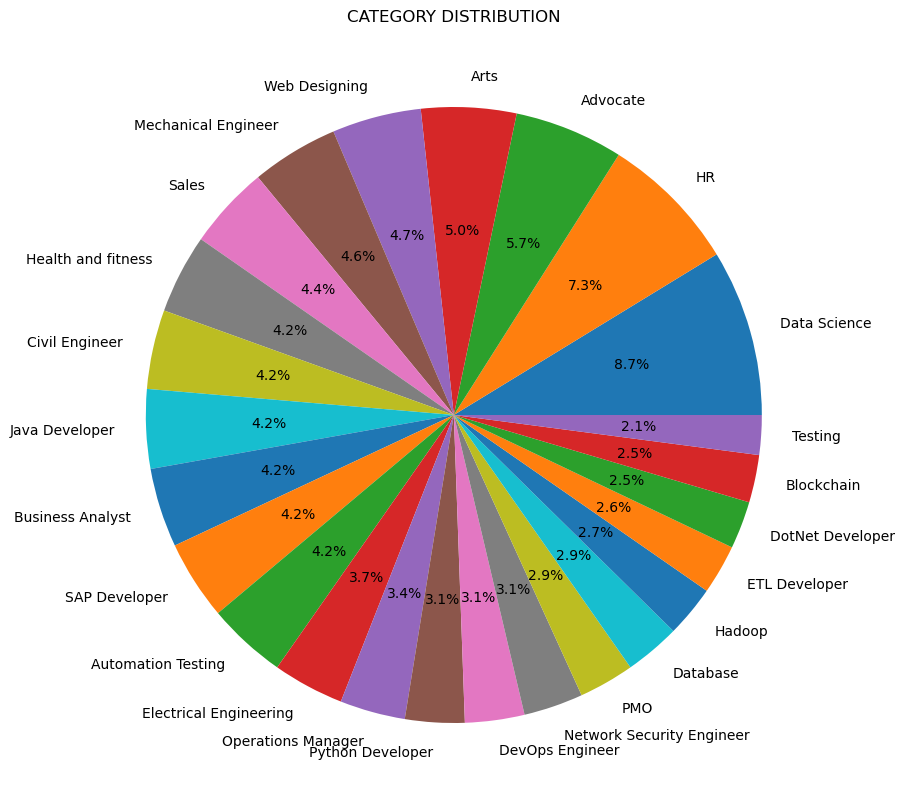

In [5]:
target_counts = resume_dataset["Category"].value_counts()
target_labels  = resume_dataset["Category"].unique()

plt.figure(figsize=(10, 10))
plt.subplot(aspect=1, title="CATEGORY DISTRIBUTION")
plt.pie(target_counts, labels=target_labels, autopct="%1.1f%%");
plt.title("CATEGORY DISTRIBUTION");

## Data Cleaning

Creating a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations:

In [6]:
import re
import string

def clean_resume(resume_text):
    resume_text = re.sub("[^a-zA-Z]", " ", resume_text)      # remove non alphabet characters
    resume_text = re.sub("http\S+\s*", " ", resume_text)     # remove URLs
    resume_text = re.sub("RT|cc", " ", resume_text)          # remove RT and cc
    resume_text = re.sub("#\S+", " ", resume_text)           # remove hashtags
    resume_text = re.sub("@\S+", " ", resume_text)           # remove mentions
    resume_text = re.sub("[%s]" % re.escape(string.punctuation), " ", resume_text)  # remove punctuations
    resume_text = re.sub(r"[^\x00-\x7f]", " ", resume_text)  # remove any character that is not a standard ASCII character
    resume_text = re.sub("\s+", " ", resume_text)            # remove extra whitespace
    return resume_text

resume_dataset["Cleaned Resume"] = resume_dataset["Resume"].apply(clean_resume)
resume_dataset.head()

,Category,Resume,Cleaned Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May to May B E UIT RGPV Data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


## Creating a wordcloud

In [7]:
import nltk
from nltk.corpus import stopwords

sentences = resume_dataset["Cleaned Resume"].values
stop_words = set(stopwords.words("english") + ['``', "''"])
total_words = []
cleaned_sentences = ""

for sentence in sentences:
    cleaned_sentences += sentence

    words = nltk.word_tokenize(sentence)
    words = [word for word in words if word not in stop_words]
    total_words.extend(words)

In [8]:
word_freq_dist = nltk.FreqDist(total_words)
most_common = word_freq_dist.most_common(20)
most_common

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('Project', 1808),
 ('project', 1579),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1252),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 991),
 ('Ltd', 934),
 ('C', 930)]

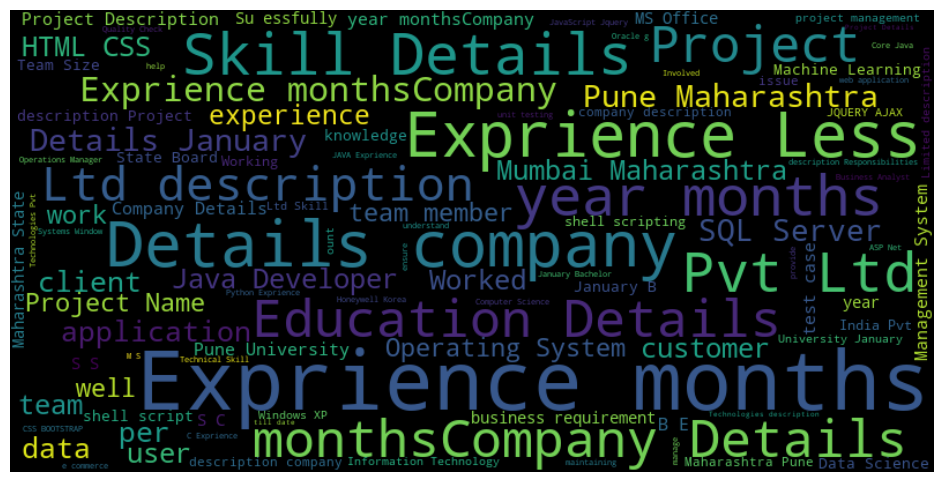

In [9]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate(cleaned_sentences)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Creating the classification model

### Matrix of resumes and labels

In [10]:
resume_dataset
resumes = resume_dataset.iloc[:, -1].values
labels = resume_dataset.iloc[:, 0].values

print(f"Resumes {resumes.shape}")
print(f"labels  {labels.shape}")
print(f"First five resumes:\n{resumes[:5]}")

Resumes (962,)
labels  (962,)
First five resumes:
['Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assi

### Converting resumes to vector of words

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words="english",
    max_features=1500
)
X = word_vectorizer.fit_transform(resumes)
print(f"Shape of X = {X.shape}")

Shape of X = (962, 1500)


### Converting labes to numeric values

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
print(f"Shape of y = {y.shape}")

Shape of y = (962,)


### Splitting dataset to train and test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test  shapes : X = {X_test.shape},  y = {y_test.shape}")

Train shapes : X = (769, 1500), y = (769,)
Test  shapes : X = (193, 1500),  y = (193,)


### Training K-Nearest Neighbors model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
   

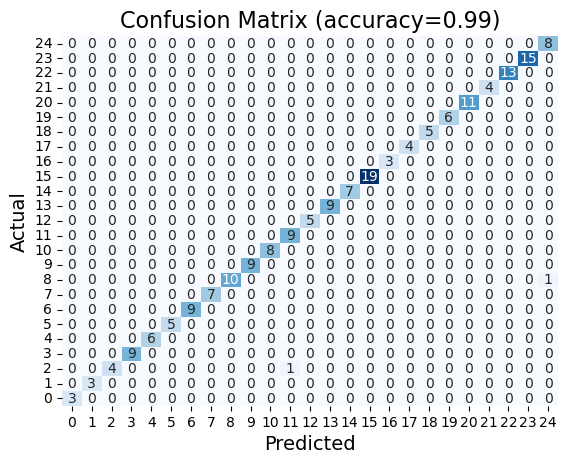

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_nb = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(
    cm, annot=True, cmap="Blues", cbar=False, fmt="d",
)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.invert_yaxis()
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Live Prediction

In [16]:
def predict_resume_category(resume):
    cleaned_resume = clean_resume(resume)
    X = word_vectorizer.transform([cleaned_resume])
    y_pred = clf.predict(X)
    category = label_encoder.inverse_transform(y_pred)
    print(f"This resume belongs to {category[0]!r} category.")
    return category

In [17]:
test_resumes = [
    """An accomplished Python developer with extensive experience in designing, developing,
    and maintaining high-performance software applications. Proficient in utilizing Python frameworks
    and libraries to deliver scalable and efficient solutions.
    """,
    """A highly skilled DevOps Engineer with a proven track record in designing, implementing,
    and managing robust infrastructure solutions. Proficient in automation, cloud computing,
    and continuous integration/continuous deployment (CI/CD) pipelines, adept at optimizing software development
    and deployment processes to maximize efficiency and reliability.
    Strong problem-solving abilities coupled with excellent communication skills,
    enabling effective collaboration across cross-functional teams for successful project delivery.
    """,
]

In [18]:
for test_resume in test_resumes:
    print(f"Review: {test_resume}")
    predict_resume_category(test_resume)
    print("-" * 40)

Review: An accomplished Python developer with extensive experience in designing, developing,
    and maintaining high-performance software applications. Proficient in utilizing Python frameworks
    and libraries to deliver scalable and efficient solutions.
    
This resume belongs to 'Python Developer' category.
----------------------------------------
Review: A highly skilled DevOps Engineer with a proven track record in designing, implementing,
    and managing robust infrastructure solutions. Proficient in automation, cloud computing,
    and continuous integration/continuous deployment (CI/CD) pipelines, adept at optimizing software development
    and deployment processes to maximize efficiency and reliability.
    Strong problem-solving abilities coupled with excellent communication skills,
    enabling effective collaboration across cross-functional teams for successful project delivery.
    
This resume belongs to 'DevOps Engineer' category.
-----------------------------------